In [2]:
### Setup Env for Local
import os; from importlib import reload;
%cd {os.environ['PROJECT_PATH']}
from utils.constants import *

from dash import dcc, html, dash_table, callback
import dash_bootstrap_components as dbc
from dash.dependencies import Input, Output, State
import plotly.express as px
import jupyter_dash


/app


In [32]:


### App Setup
from dash_app.cache import redis_store
from dash_app.components import datatable_comp; reload(datatable_comp)
DataTableAIO = datatable_comp.DataTableAIO
from dash_app.components import load_data_nipams_comp; reload(load_data_nipams_comp)
PythonDataLoaderAIO = load_data_nipams_comp.PythonDataLoaderAIO
from dash_app.components import overview_data_nipams_comp; reload(overview_data_nipams_comp)
NipamsDataOverviewAIO = overview_data_nipams_comp.NipamsDataOverviewAIO


app = jupyter_dash.JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])
input_data_comp = PythonDataLoaderAIO(aio_id='input_data_comp')
# filter_data_comp = DataTableAIO(df=pd.DataFrame(), aio_id='filter_data_comp')
overview_data_comp = NipamsDataOverviewAIO(aio_id='overview_data_comp')

app.layout = dbc.Col([
    input_data_comp, 
    html.Div(id='filter_table'),
    # filter_data_comp,
    overview_data_comp,
])




@app.callback(
    # Output(filter_data_comp.ids.store('filter_data_comp'),'data'),
    Output('filter_table','children'),
    Input(input_data_comp.ids.store('input_data_comp'), 'data')
)
def from_input_to_filter(df_key):
    print('render_overview_container', df_key);
    # df = redis_store.load(df_key)
    return DataTableAIO(df=df, aio_id='filter_data_comp')
    # return {"df":df_key}
    
# @app.callback(
#     Output(filter_data_comp.ids.store('overview_data_comp'),'data'),
#     # Output('filter_table','children'),
#     Input(input_data_comp.ids.store('input_data_comp'), 'data')
# )
# def from_input_to_filter2(df_key):
#     print('render_overview_container', df_key);
#     df = redis_store.load(df_key)
#     return {"df":df_key}
#     # return DataTableAIO(df=df, aio_id='filter_data_comp')

# @app.callback(
#     Output(overview_data_comp.ids.store('overview_data_comp'),'data'),
#     Input(input_data_comp.ids.store('input_data_comp'), 'data')
# )
# def from_input_to_overview(df):
#     print('render_overview_container', df);
#     return df
    
@app.callback(
    Output(overview_data_comp.ids.store('overview_data_comp'),'data'),
    Input(filter_data_comp.ids.store_out('filter_data_comp'), 'data')
)
def from_filter_to_overview(df):
    print('render_overview_container', df);
    return df
    
    
app.run_server(mode='external',port=8502, host="0.0.0.0", debug=True, **{'width': '800px', 'height': '400px'})  


/app
PythonDataLoaderAIO.__init__ input_data_comp


/usr/local/lib/python3.8/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



Dash app running on http://0.0.0.0:8502/
input-file-pattern, button-load ['HLV', 'LLV'] 0
input-file-pattern, button-load 6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3 (195376, 19)
print_success_msg 6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3
render_overview_container 6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3
datatable_comp filter  {'df': '6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3'}
render_overview_container 6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3
input-file-pattern, button-load ['HLV', 'LLV'] 0
input-file-pattern, button-load 6d4c810f0891bc49ddb12192c67f2f805ea8

In [41]:
app = jupyter_dash.JupyterDash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])


print('data_overview.py')
import dash
from dash import callback, html, dcc, Input, Output, State, MATCH
import dash_bootstrap_components as dbc

from utils.constants import *
from dash_app.cache import redis_store

# from app import app
# import data_table

# from dash_app.components.datatable_comp import DataTableAIO
# from dash_app.components.load_data_nipams_comp import PythonDataLoaderAIO
# from dash_app.components.overview_data_nipams_comp import NipamsDataOverviewAIO
from dash_app.components import datatable_comp; reload(datatable_comp)
DataTableAIO = datatable_comp.DataTableAIO
from dash_app.components import load_data_nipams_comp; reload(load_data_nipams_comp)
PythonDataLoaderAIO = load_data_nipams_comp.PythonDataLoaderAIO
from dash_app.components import overview_data_nipams_comp; reload(overview_data_nipams_comp)
NipamsDataOverviewAIO = overview_data_nipams_comp.NipamsDataOverviewAIO


input_data_comp = PythonDataLoaderAIO(aio_id='input_data_comp')
filter_data_comp = DataTableAIO(df=pd.DataFrame(), aio_id='filter_data_comp')
overview_data_comp = NipamsDataOverviewAIO(aio_id='overview_data_comp')


layout = dbc.Col([
    html.H1('Data Loading', style={"textAlign": "center"}),
    input_data_comp, 
    dbc.CardBody([
        html.H4("Filter DataFrame", className="card-title"),html.P("Apply Columns Filters to Update Selected Data",className="card-text"),
        dbc.Spinner([
            html.Div(id='filter_table')
        ], color='primary', spinner_style={'width':'5rem','height':'5rem'}),
    ]),
    # filter_data_comp,
    overview_data_comp,
    dbc.CardBody([
        html.H4("Finalize Selection", className="card-title", style={"textAlign": "center"}),
        dbc.Button(id='', children=['Confirm Selection'])
        # dbc.Spinner([
        #     html.Div(id='filter_table')
        # ], color='primary', spinner_style={'width':'5rem','height':'5rem'}),
    ]),
    dcc.Store(id='page_data_load_output')
])

@app.callback(
    # Output(filter_data_comp.ids.store('filter_data_comp'),'data'),
    Output('filter_table','children'),
    Input(input_data_comp.ids.store('input_data_comp'), 'data')
)
def from_input_to_filter(df_key):
    print('from_input_to_filter', df_key)
    df = redis_store.load(df_key)
    return DataTableAIO(df=df, aio_id='filter_data_comp')
    # return {"df":df_key}

@app.callback(
    Output(overview_data_comp.ids.store('overview_data_comp'),'data'),
    Input(filter_data_comp.ids.store_out('filter_data_comp'), 'data')
)
def from_filter_to_overview(df=''):
    print('from_filter_to_overview', df)
    return df

@app.callback(
    Output('page_data_load_output','data'),
    Input(filter_data_comp.ids.store_out('filter_data_comp'), 'data')
)
def from_overview_to_output(df):
    print('from_overview_to_output', df)
    return df

app.layout = layout
app.run_server(mode='external',port=8501, host="0.0.0.0", debug=True, **{'width': '800px', 'height': '400px'})  


data_overview.py
PythonDataLoaderAIO.__init__ input_data_comp
datatable_comp filter  {'df': '6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3'}


/usr/local/lib/python3.8/site-packages/jupyter_dash/jupyter_app.py:139: UserWarning:

The 'environ['werkzeug.server.shutdown']' function is deprecated and will be removed in Werkzeug 2.1.



Dash app running on http://0.0.0.0:8501/
input-file-pattern, button-load ['HLV', 'LLV'] 0
input-file-pattern, button-load 6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3 (195376, 19)
print_success_msg 6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3
from_input_to_filter 6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3
datatable_comp filter  {'df': '6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3'}
from_filter_to_overview 6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3
from_overview_to_output 6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5

/usr/local/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/app/src/dash_app/components/overview_data_nipams_comp.py:44: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [11]:
str(overview_data_nipams_comp.summarize_vcg_data(df))

"{'Number of Patients': 9, 'Total Rows': 195376, 'Total Columns': 19, 'Total Heartbeats': 1140}"

In [14]:
import json
from dash_app.cache import redis_store
df = redis_store.load('6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3')
# json.dumps(overview_data_nipams_comp.summarize_vcg_data(df))
df

,file,ax,ay,az,gx,gy,gz,heartbeat,patient,test_type,test_num,tsCC,ts,pp,sbp,dbp,test_type_bp,test_num_bp,patient_bp
0,sub112_HLV1.mat,-1.122880,-0.571017,-9.860519,0.362396,3.185272,-0.434875,3.0,sub112,HLV,1,True,2699000000,56.675948,118.611859,61.935911,HLV,1,sub112
1,sub112_HLV1.mat,-1.137246,-0.603339,-9.835379,0.457764,3.463745,-0.640869,3.0,sub112,HLV,1,True,2704000000,56.675948,118.611859,61.935911,HLV,1,sub112
2,sub112_HLV1.mat,-1.096544,-0.555455,-9.897629,0.656128,3.807068,-0.511169,3.0,sub112,HLV,1,True,2709000000,56.675948,118.611859,61.935911,HLV,1,sub112
3,sub112_HLV1.mat,-1.104924,-0.611718,-9.907205,0.244141,3.414154,-0.507355,3.0,sub112,HLV,1,True,2714000000,56.675948,118.611859,61.935911,HLV,1,sub112
4,sub112_HLV1.mat,-1.096544,-0.575805,-9.947907,0.442505,3.047943,-0.320435,3.0,sub112,HLV,1,True,2719000000,56.675948,118.611859,61.935911,HLV,1,sub112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81318,sub221_LLV3.mat,2.831143,0.289698,-9.898826,-6.214142,-5.847931,-0.667572,41.0,sub221,LLV,3,True,28472000000,44.949636,118.662947,73.713311,None,None,None
81319,sub221_LLV3.mat,2.786850,0.284910,-10.290278,-3.707886,-8.377075,-0.907898,41.0,sub221,LLV,3,True,28477000000,44.949636,118.662947,73.713311,None,None,None
81320,sub221_LLV3.mat,2.762908,0.308852,-10.319008,-1.396179,-10.063171,-0.953674,41.0,sub221,LLV,3,True,28482000000,44.949636,118.662947,73.713311,None,None,None
81321,sub221_LLV3.mat,2.650381,0.244209,-10.163385,0.274658,-10.032654,-0.915527,41.0,sub221,LLV,3,True,28487000000,44.949636,118.662947,73.713311,None,None,None


/tmp/ipykernel_8025/787633822.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



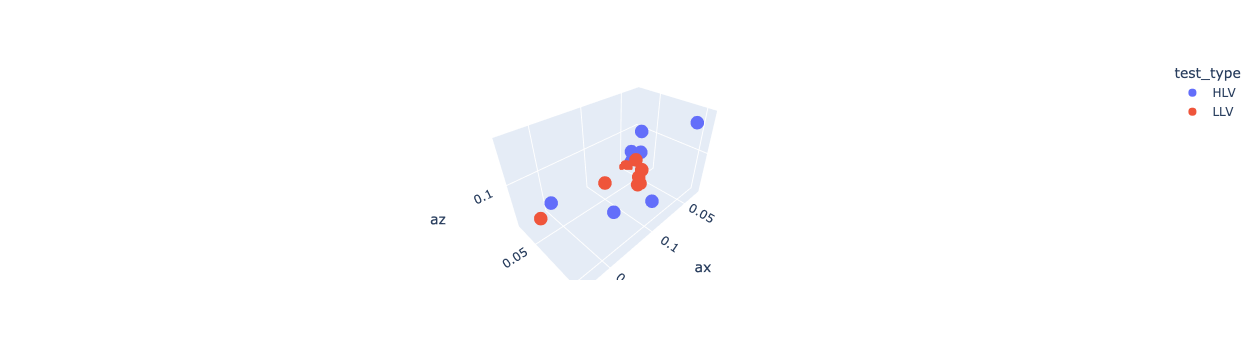

input-file-pattern, button-load ['HLV', 'LLV'] 0


In [37]:
df_scat = df.groupby(['test_type','file'])['ax','ay','az'].std().round(3).reset_index()
px.scatter_3d(df_scat, x='ax',y='ay',z='az', hover_name='file', color='test_type')

In [27]:
df_res = df.sample(2000)
path_cols = ['test_type','patient','test_num']
df_res = df.groupby(path_cols).agg({
    'heartbeat':'nunique',
    'sbp':'mean',
    'dbp':'mean',
}).reset_index()
df_res

,test_type,patient,test_num,heartbeat,sbp,dbp
0,HLV,sub112,1,49,117.154628,67.932276
1,HLV,sub112,2,33,122.102721,66.892080
2,HLV,sub176,1,63,101.776023,70.253426
3,HLV,sub176,2,103,110.610125,72.462400
4,HLV,sub176,3,92,121.639005,77.251068
5,HLV,sub227,1,32,125.924073,61.882821
6,HLV,sub227,2,37,112.922011,53.174477
7,HLV,sub227,3,31,109.844823,50.109987
8,HLV,sub251,1,94,106.392412,74.376317
9,HLV,sub251,2,103,109.650289,79.825368


/usr/local/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/usr/local/lib/python3.8/site-packages/plotly/express/_core.py:1637: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



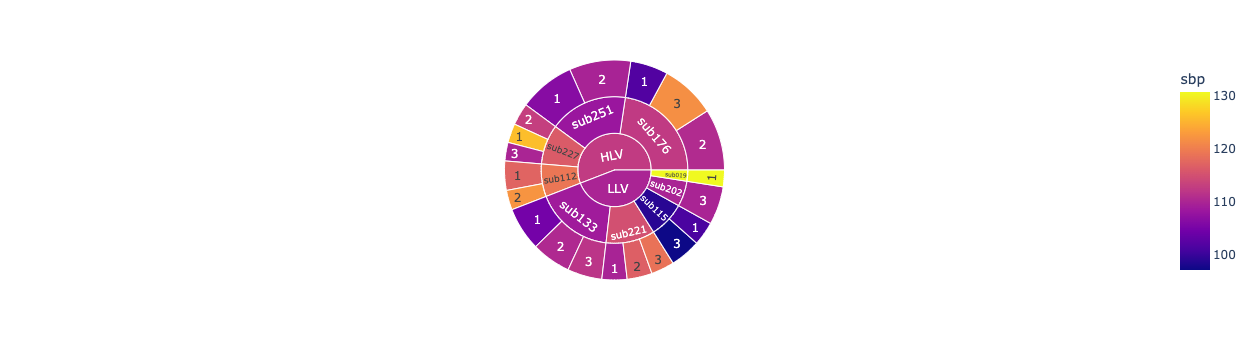

input-file-pattern, button-load ['HLV', 'LLV'] 0
input-file-pattern, button-load 6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3 (195376, 19)
print_success_msg from_input_to_filter 6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3
6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3
datatable_comp filter  {'df': '6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3'}
from_filter_to_overview 6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3
from_overview_to_output 6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3


In [28]:
px.sunburst(df_res, path=path_cols, values='heartbeat', color='sbp')

In [20]:
df_res

,test_type,patient,test_num,heartbeat
0,HLV,sub112,1,37
1,HLV,sub112,2,25
2,HLV,sub176,1,52
3,HLV,sub176,2,88
4,HLV,sub176,3,80
5,HLV,sub227,1,28
6,HLV,sub227,2,29
7,HLV,sub227,3,27
8,HLV,sub251,1,81
9,HLV,sub251,2,86


In [25]:
'Success! Loaded DataFrame ({} rows x {} columns)'.format(*df.shape)

'Success! Loaded DataFrame (195376 rows x 19 columns)'

input-file-pattern, button-load ['HLV', 'LLV'] 0
print_success_msg 6d4c810f0891bc49ddb12192c67f2f805ea84d05b85b6e764eebd8dbcfc48bb1724489574d53558ffba8985bedfe421780c5d8c5fe5520f5298a721b7a1346d3


In [22]:
df

,file,ax,ay,az,gx,gy,gz,heartbeat,patient,test_type,test_num,tsCC,ts,pp,sbp,dbp,test_type_bp,test_num_bp,patient_bp
0,sub112_HLV1.mat,-1.122880,-0.571017,-9.860519,0.362396,3.185272,-0.434875,3.0,sub112,HLV,1,True,2699000000,56.675948,118.611859,61.935911,HLV,1,sub112
1,sub112_HLV1.mat,-1.137246,-0.603339,-9.835379,0.457764,3.463745,-0.640869,3.0,sub112,HLV,1,True,2704000000,56.675948,118.611859,61.935911,HLV,1,sub112
2,sub112_HLV1.mat,-1.096544,-0.555455,-9.897629,0.656128,3.807068,-0.511169,3.0,sub112,HLV,1,True,2709000000,56.675948,118.611859,61.935911,HLV,1,sub112
3,sub112_HLV1.mat,-1.104924,-0.611718,-9.907205,0.244141,3.414154,-0.507355,3.0,sub112,HLV,1,True,2714000000,56.675948,118.611859,61.935911,HLV,1,sub112
4,sub112_HLV1.mat,-1.096544,-0.575805,-9.947907,0.442505,3.047943,-0.320435,3.0,sub112,HLV,1,True,2719000000,56.675948,118.611859,61.935911,HLV,1,sub112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81318,sub221_LLV3.mat,2.831143,0.289698,-9.898826,-6.214142,-5.847931,-0.667572,41.0,sub221,LLV,3,True,28472000000,44.949636,118.662947,73.713311,None,None,None
81319,sub221_LLV3.mat,2.786850,0.284910,-10.290278,-3.707886,-8.377075,-0.907898,41.0,sub221,LLV,3,True,28477000000,44.949636,118.662947,73.713311,None,None,None
81320,sub221_LLV3.mat,2.762908,0.308852,-10.319008,-1.396179,-10.063171,-0.953674,41.0,sub221,LLV,3,True,28482000000,44.949636,118.662947,73.713311,None,None,None
81321,sub221_LLV3.mat,2.650381,0.244209,-10.163385,0.274658,-10.032654,-0.915527,41.0,sub221,LLV,3,True,28487000000,44.949636,118.662947,73.713311,None,None,None
